In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats

In [6]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Junichiro Koizumi'
 'Laura Bush' 'Lleyton Hewitt' 'Serena Williams' 'Tony Blair']
(1455, 62, 47)


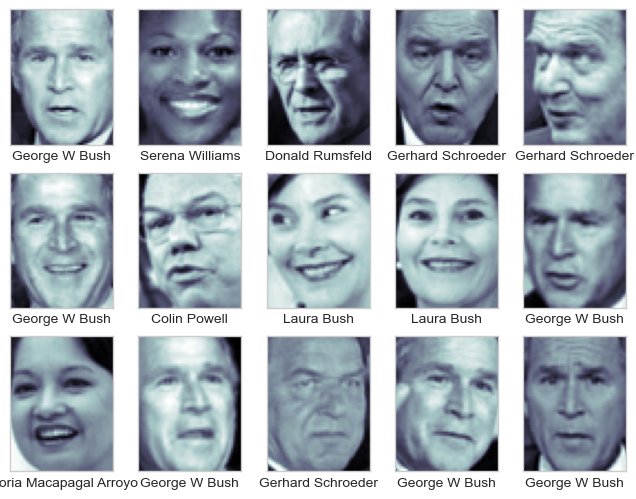

In [7]:
fig,ax = plt.subplots(3,5,figsize=(8,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[], yticks=[],
        xlabel=faces.target_names[faces.target[i]])

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier


Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],  
}

grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)


CPU times: total: 2min 7s
Wall time: 2min 7s
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten=True,
         svd_solver='ramdomized',random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [12]:
From sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,10,50],
            'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid= GridSearchCV(model,param_grid)

%time grid.fit(Xtrain,Ytrain)
print(grid.best_params_)



from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest=train_test_split(faces.data,faces.target,random_state=42)



from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,10,50],
            'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid= GridSearchCV(model,param_grid)

%time grid.fit(Xtrain,Ytrain)
print(grid.best_params_)

SyntaxError: invalid syntax (1498009440.py, line 1)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Define the model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define parameter grid
param_grid = {
    'svc__C': [1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}

# Initialize GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)

# Fit the model
%time grid.fit(Xtrain, ytrain)

# Get the best parameters
print(grid.best_params_)


CPU times: total: 1min 20s
Wall time: 1min 20s
{'svc__C': 50, 'svc__gamma': 0.0001}


In [13]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

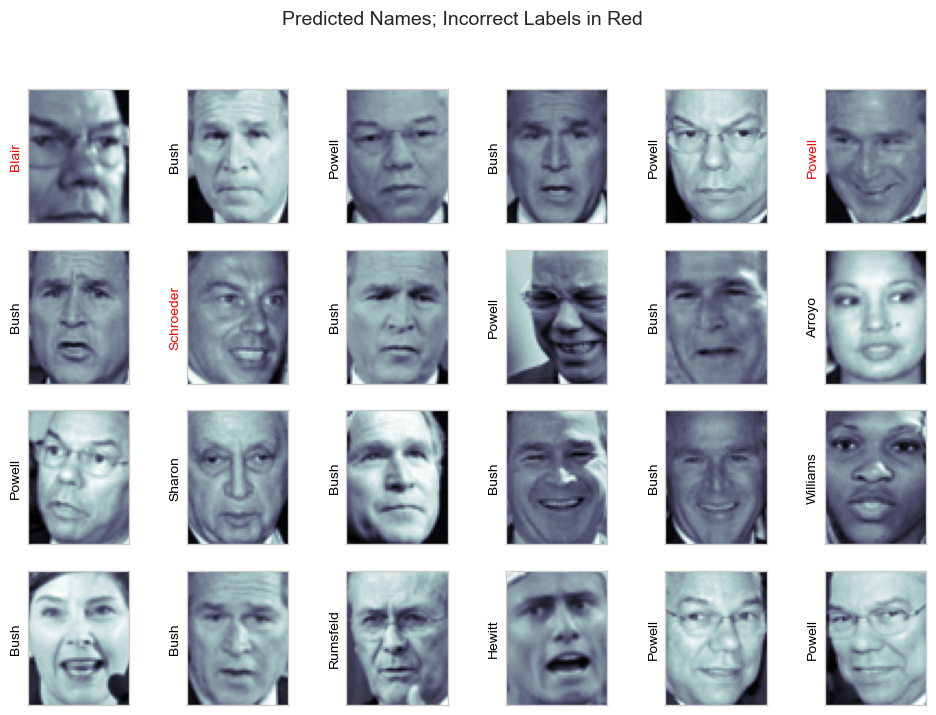

In [14]:
fig, ax = plt.subplots(4, 6, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(
        faces.target_names[yfit[i]].split()[-1],
        color='black' if yfit[i] == ytest[i] else 'red'
    )
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)